## [개념정리]
### 1. 분류
* 학습데이터로 주어진 데이터의 피처와 레이블 값을 머신러닝 알고리즘으로 학습해 모델을 생성, 미지의 레이블 예측
* 분류 : 로지스틱 회귀, 결정트리, 앙상블
* 앙상블 : 서로 다른 또는 같은 알고리즘을 결합함

    -> 기본 알고리즘 :결정트리(복잡한 규칙 구조를 가짐, 과접합 발생 가능)

    -> 매우 많은 여러가지의 약한 학습기를 결합하고 가중치를 계속 업데이트하면서 예측 성능 향상시킴
* 앙승블 종류 :Bagging & Boosting
    1) bagging > Random Forest
    2) boosting > Gradient Boosing -(수행시간이 오래걸리는 단점:해결)-> XgBoost와 LightBGM


### 2. 결정트리
* 결정트리의 구조: 규칙노트(규칙 조건 표시), 리프노드, 서브 트리
* 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음
  
  -> 최대한 균일한 데이터 세트를 구성할 수 있도록 분할할 필요가 있음

* 결정노드 : 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦(균일도 높은 것은 bad)
  
  -> 서브 데이터 만들기 -> 균일도가 높은 자식 데이터 세트 쪼개는 방식

* 균일도 측정
  1) 엔트로피를 이용한 정보 이득지수
    * 엔트로피: 주어진 데이터 집합의 혼잡도 의미
    * 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같으면 엔트로피가 낮다
    * 정보 이득 지수 = 1 - 엔트로피 지수
    * 정보 이득이 높은 속성을 기준으로 분할함
  
  2) 지니계수
     * 0이 가장 평등하고 1로 갈수록 불평등
     * 지니계수가 낮을수록 데이터 균일도가 높은 것임

* DecisionTreeClassifier(분류) & DecisionTreeRegressor(회귀)
    * min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수
    * min_samples_leaf : 왼쪽과 오른쪽 노드에서 가져야 할 최소한의 샘플데이터 수
    * max_feature : sqrt, auto, log, none 분할 수행
    * max_depth : 트리의 최대 깊이 규정
* 특징 : 균일도를 기반으로 함 + 전처리 작업 필요 없음 + 과접합으로 정확도 떨어짐 -> 트리의 트기를 사전에 제한하는 것이 좋음
* 시각화 : Graphviz패키지 사용

색갈이 짙어질수록 지니계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다

* DecisionTreeClassfier의 feature_importances 속성
  * ndarray 형태로 반환, 피처 순서대로 값이 할당
  * 일반적으로 값이 높을수록 해당 피처의 중요도가 높다는 의미

결정트리가 어떻게 학습 데이터를 분할해 예측을 수행할수있는지와 과접합 문제를 시각화

make_classification() : 분류를 위한 테스트용 데이터를 쉽게 만들수 있도록

visualize_boundary(): 유틸리티 함수

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 데이터 세트로 분리
iris_data=load_iris()
X_train, X_test,y_train,y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifer 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

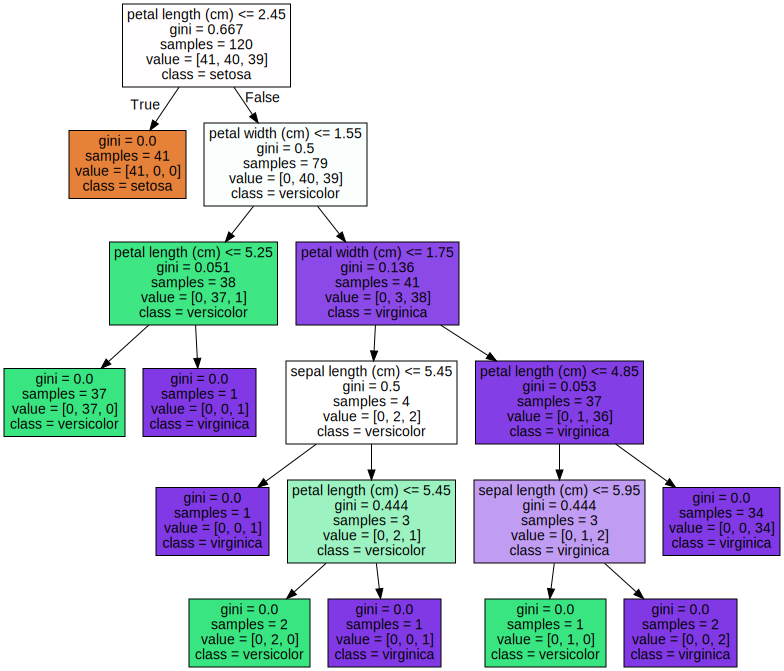

In [7]:
import graphviz
# 위에서 생성한 tree.dot 파일을 Graphviz가 읽어서 쥬피터 노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

색갈이 짙어질수록 지니계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다

* DecisionTreeClassfier의 feature_importances 속성
  * ndarray 형태로 반환, 피처 순서대로 값이 할당
  * 일반적으로 값이 높을수록 해당 피처의 중요도가 높다는 의미

Feature importance :
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

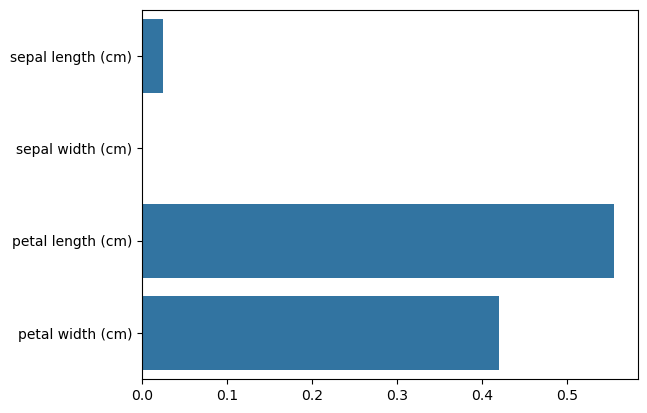

In [8]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importance :\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name,value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)


결정트리가 어떻게 학습 데이터를 분할해 예측을 수행할수있는지와 과접합 문제를 시각화

make_classification() : 분류를 위한 테스트용 데이터를 쉽게 만들수 있도록

visualize_boundary(): 유틸리티 함수

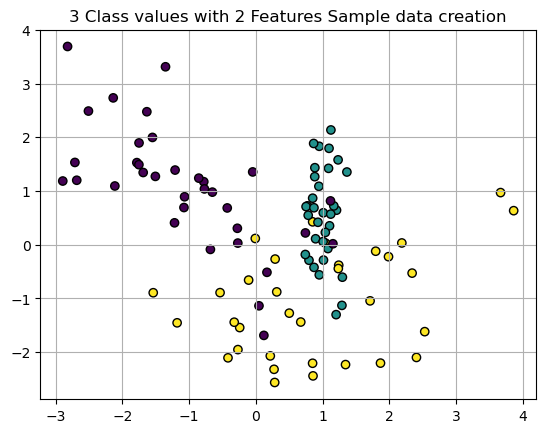

In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, edgecolor='k')
plt.grid(True)

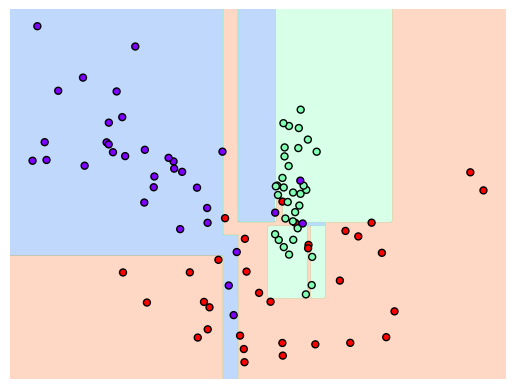

In [13]:
from sklearn.tree import DecisionTreeClassifier

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
   
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
   
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
   
    # contourf()를 이용하여 class boundary를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정경계 시각화
dt_clf=DecisionTreeClassifier(random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

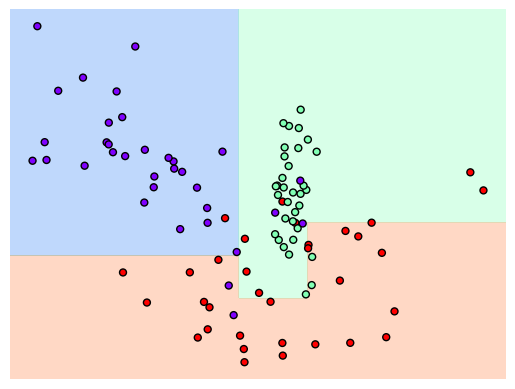

In [14]:
#min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6,random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df=pd.read_csv(".\data\human_activity_features.txt", sep='\s+', header=None, names=['column_index','columns_name'])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [29]:
feature_dup_df=feature_name_df.groupby('columns_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
columns_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [35]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df=feature_dup_df.reset_index()
    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df=new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [36]:
import pandas as pd

def get_human_dataset():
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 함당.
    feature_name_df = pd.read_csv('./data/human_activity_features.txt', sep='\s+',
                                  header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./data/human_activity_X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./data/human_activity_X_test.txt', sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./data/human_activity_y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./data/human_activity_y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [37]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [38]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 :\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [41]:
from sklearn.model_selection import GridSearchCV

params={'max_depth': [6,8,10,12,16,20,24], 'min_samples_split':[16]}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최고 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최고 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [44]:
#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df=pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습데이터의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [45]:
max_depths=[6,8,10,12,16,20,24]
#max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf=DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train,y_train)
    pred=dt_clf.predict(X_test)
    accuracy=accuracy_score(y_test, pred)
    print('max_depth={0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth=6 정확도: 0.8551
max_depth=8 정확도: 0.8717
max_depth=10 정확도: 0.8599
max_depth=12 정확도: 0.8571
max_depth=16 정확도: 0.8599
max_depth=20 정확도: 0.8565
max_depth=24 정확도: 0.8565


결정 트리는 깊이가 깊어질수록 과접합의 영향력이 커지므로 하이퍼 파라미터를 이용해서 깊이를 제어하기

In [48]:
params={'max_depth': [8,12,16,20], 'min_samples_split':[16,24]}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [51]:
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


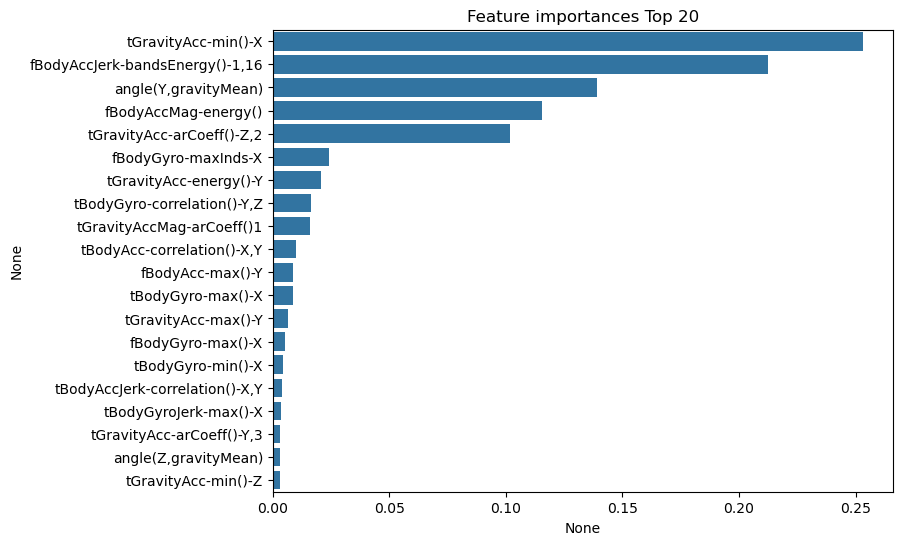

In [56]:
import seaborn as sns
ftr_importances_values=best_df_clf.feature_importances_
#Top 중요도로 정렬을 쉽게하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
#중요도 순으로 Series를 정렬
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()